In [1]:
# Melhor Roteiro para Minissérie ou Filme para TV

import requests
from bs4 import BeautifulSoup

planilha = []

links_episodios = ["https://www.imdb.com/title/tt8162428/?ref_=ttep_ep1",
                   "https://www.imdb.com/title/tt8482972/?ref_=ttep_ep2",
                   "https://www.imdb.com/title/tt9166672/?ref_=ttep_ep3",
                   "https://www.imdb.com/title/tt9166678/?ref_=ttep_ep4",
                   "https://www.imdb.com/title/tt9166696/?ref_=ttep_ep5",
                   "https://www.imdb.com/title/tt7571640/?ref_=ttep_ep6",
                   "https://www.imdb.com/title/tt7627118/?ref_=ttep_ep7",
                   "https://www.imdb.com/title/tt8746508/?ref_=ttep_ep8",
                   "https://www.imdb.com/title/tt8135650/?ref_=ttep_ep1",
                   "https://www.imdb.com/title/tt8135652/?ref_=ttep_ep2",
                   "https://www.imdb.com/title/tt8135658/?ref_=ttep_ep3",
                   "https://www.imdb.com/title/tt8805244/?ref_=ttep_ep4"]

for link in links_episodios: # Pega cada link da lista de links para fazer a requisição
    requisicao = requests.get(link)

    sopa = BeautifulSoup(requisicao.content, "html.parser") # Dados brutos da página inteira
    
    # Conjunto que acha o nome da série
    acha_nome = sopa.find("div", {"class": "titleParent"})
    nome_serie = acha_nome.find("a").text

    # Conjunto que acha a temporada e o número do episódio
    acha_temp_episodio = sopa.find("div", {"class": "bp_description"})
    temp_episodio = acha_temp_episodio.find("div", {"class": "bp_heading"}).text.strip() # Temporada e episódio dentro da mesma tag separados por |
    lista = temp_episodio.split(" | ") # Comando split e cria uma lista com os dois itens
    temporada = lista[0] # Primeiro item da lista corresponde à temporada
    episodio = lista[1] # Segundo item da lista corresponde ao episódio
    temporada = temporada.replace("Season ", "") # Limpa para deixar só o número
    episodio = episodio.replace("Episode", "") # Limpa para deixar só o número
    
    # Conjunto que acha o nome do episódio
    acha_nome_episodio = sopa.find("div", {"class": "title_wrapper"}) # Div com o nome do episódio
    nome_episodio = acha_nome_episodio.find("h1").text.strip() # Limpa só o nome do episódio
    
    # Conjunto que acha a avaliação do episódio
    avaliacao = sopa.find("div", {"class": "imdbRating"})
    nota = avaliacao.find("span", {"itemprop": "ratingValue"}).text.strip()
    votos = avaliacao.find("span", {"itemprop": "ratingCount"}).text.strip()
    votos = votos.replace(",", "") # Limpa para poder converter para inteiro
    
    dicionario = {"serie": nome_serie, "temporada": temporada, "episodio": episodio, "nome_episodio": nome_episodio, "nota": float(nota), "votos": int(votos)} # Monta o dicionário
    planilha.append(dicionario) # Adiciona planilha ao dicionário
    
print(planilha)

[{'serie': 'Chernobyl', 'temporada': '1', 'episodio': ' 1', 'nome_episodio': '1:23:45', 'nota': 9.5, 'votos': 42701}, {'serie': 'Chernobyl', 'temporada': '1', 'episodio': ' 2', 'nome_episodio': 'Please Remain Calm', 'nota': 9.7, 'votos': 40352}, {'serie': 'Chernobyl', 'temporada': '1', 'episodio': ' 3', 'nome_episodio': 'Open Wide, O Earth', 'nota': 9.6, 'votos': 37796}, {'serie': 'Chernobyl', 'temporada': '1', 'episodio': ' 4', 'nome_episodio': 'The Happiness of All Mankind', 'nota': 9.5, 'votos': 35375}, {'serie': 'Chernobyl', 'temporada': '1', 'episodio': ' 5', 'nome_episodio': 'Vichnaya Pamyat', 'nota': 9.9, 'votos': 45689}, {'serie': 'Escape at Dannemora', 'temporada': '1', 'episodio': ' 6', 'nome_episodio': 'Part 6', 'nota': 7.9, 'votos': 615}, {'serie': 'Escape at Dannemora', 'temporada': '1', 'episodio': ' 7', 'nome_episodio': 'Part 7', 'nota': 8.5, 'votos': 515}, {'serie': 'Fosse/Verdon', 'temporada': '1', 'episodio': ' 8', 'nome_episodio': 'Providence', 'nota': 8.9, 'votos': 

In [2]:
import pandas

df = pandas.DataFrame(planilha)
df.to_csv("roteiro-minisserie-filme-tv.csv", sep = ";", encoding = "utf-8")
df.sort_values(by = "nota", ascending = False)

,episodio,nome_episodio,nota,serie,temporada,votos
4,5,Vichnaya Pamyat,9.9,Chernobyl,1,45689
1,2,Please Remain Calm,9.7,Chernobyl,1,40352
2,3,"Open Wide, O Earth",9.6,Chernobyl,1,37796
11,4,Part Four,9.6,Olhos que Condenam,1,2899
0,1,1:23:45,9.5,Chernobyl,1,42701
3,4,The Happiness of All Mankind,9.5,Chernobyl,1,35375
7,8,Providence,8.9,Fosse/Verdon,1,147
6,7,Part 7,8.5,Escape at Dannemora,1,515
10,3,Episode #1.3,8.4,A Very English Scandal,1,385
9,2,Episode #1.2,8.0,A Very English Scandal,1,415


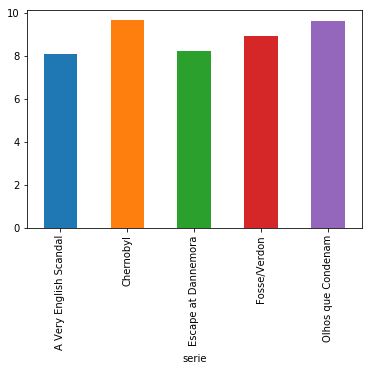

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt

agrupamento1 = df.groupby("serie")["nota"].mean()
agrupamento1.plot.bar()

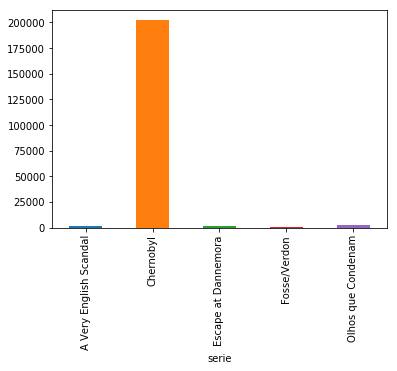

In [4]:
agrupamento2 = df.groupby("serie")["votos"].sum()
agrupamento2.plot.bar()